In [1]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

C:\Users\CBNU\anaconda3\envs\test\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digit_dataset["images"].shape

(1797, 8, 8)

In [5]:
digit_dataset['target'][0]

0

In [6]:
digit_dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

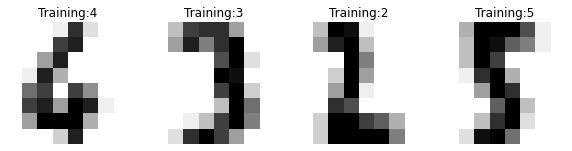

In [8]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))

for ax in axes:
    num = randint(1, 1000)
    image = digit_dataset['images'][num]
    label = digit_dataset['target'][num]
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training:%i' % label)

In [9]:
digit_dataset['data'][0].shape

(64,)

In [11]:
from sklearn.model_selection import train_test_split

X = digit_dataset['data']
y = digit_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class = 'ovr')
logreg_softmax = LogisticRegression(multi_class = 'multinomial', solver = 'sag')

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

C:\Users\CBNU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CBNU\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [14]:
import numpy as np
from sklearn import metrics

y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label = 2)